### DualSPH / test-16

- Reference test case: https://www.spheric-sph.org/tests/test-16 / [DOI](https://www.researchgate.net/publication/339989054_Tri-periodic_fully_three-dimensional_analytic_solutions_for_the_Navier-Stokes_equations)
    - [Average kinetic energy per unit of mass (family 1)](https://static.wixstatic.com/media/9449af_66547a7e2674456dbfcf5859b822feb7~mv2.jpg/v1/fill/w_940,h_415,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/9449af_66547a7e2674456dbfcf5859b822feb7~mv2.jpg)
        - $\overline{\in}(t) = \frac{1}{L^3}\int_{0}^{L}\int_{0}^{L}\int_{0}^{L}\frac{\left\| u \right\|^2}{2}dV$
        - $\overline{\in}(0) = \frac{U_0^2}{2}$

In [2]:
# python3 -m ipykernel install --user --name=myvenv
import math as m
import numpy as np

In [48]:
def avg_kinetic_energy(vel_x, vel_y, vel_z, cubeside):
    return sum(vx**2 + vy**2 + vz**2 for vx, vy, vz in zip(vel_x, vel_y, vel_z)) * (1/cubeside)**3 / 2

# cubeside = {$30^3$, $32^3$, $50^3$}

```
Pos.x [m];Pos.y [m];Pos.z [m];Idp;Vel.x [m/s];Vel.y [m/s];Vel.z [m/s];Rhop [kg/m^3];Type;
  0.0000000E+00;  0.0000000E+00;  0.0000000E+00;0; -9.4280905E-01; -9.4280905E-01; -9.4280905E-01;  1.0000000E+03;3;
  0.0000000E+00;  0.0000000E+00;  3.3000000E-02;1; -1.0907011E+00; -7.5452876E-01; -9.2261493E-01;  1.0000000E+03;3;
...
```

In [72]:
cubeside = 50
last_step = 150
kenergy = []
for step in range(0, last_step+1):
    infile = f'data/spheric16_{cubeside}/out/data/PartCsv_{step:04}.csv'
    data = np.genfromtxt(infile, delimiter=';', skip_header=1)
    # pos_x = data[:, 0]  # numpy.ndarray
    # pos_y = data[:, 1]
    # pos_z = data[:, 2]    
    # vel_x = data[:, 4]
    # vel_y = data[:, 5]
    # vel_z = data[:, 6]
    kenergy.append(avg_kinetic_energy(data[:, 4], data[:, 5], data[:, 6], cubeside))

In [73]:
max(kenergy), min(kenergy)

(0.500000054789989, 0.46663659940822116)

In [68]:
len(kenergy) == last_step+1
# len(vel_x) == 30**3

True

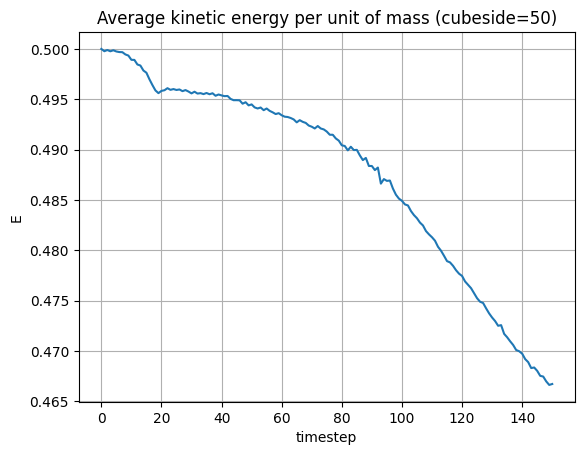

In [74]:
# import matplotlib
# matplotlib.use('Agg')
# matplotlib.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
plt.plot(kenergy)
plt.grid(True)
plt.title(f"Average kinetic energy per unit of mass (cubeside={cubeside})")
plt.xlabel("timestep")
plt.ylabel("E")
plt.show()
# plt.close()

# Average kinetic energy per unit of mass at t=0
$\overline{\in}_{t0} = \frac{U_0^2}{2}$

In [75]:
for cubeside in [30, 32, 50]:
    infile = f'data/spheric16_{cubeside}/out/data/PartCsv_0000.csv'
    data = np.genfromtxt(infile, delimiter=';', skip_header=1)
    ke = avg_kinetic_energy(data[:, 4], data[:, 5], data[:, 6], cubeside)
    print(f"{cubeside}: {ke}")

30: 0.493485124784463
32: 0.5000000548892132
50: 0.500000054789989
